开始处理《西游记》文本...
成功使用 latin-1 编码读取文件


Building prefix dict from the default dictionary ...


文本清理完成，长度: 773 字符


Dumping model to file cache /tmp/jieba.cache
Loading model cost 1.853 seconds.
Prefix dict has been built successfully.


分词完成，共得到 193 个词，101 个唯一词汇
所有结果已保存到: ../../data/journey_to_the_west/journey_to_the_west_segmented


/tmp/ipykernel_21493/2042260.py:160: UserWarning: Glyph 35789 (\N{CJK UNIFIED IDEOGRAPH-8BCD}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_21493/2042260.py:160: UserWarning: Glyph 39057 (\N{CJK UNIFIED IDEOGRAPH-9891}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_21493/2042260.py:160: UserWarning: Glyph 12298 (\N{LEFT DOUBLE ANGLE BRACKET}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_21493/2042260.py:160: UserWarning: Glyph 35199 (\N{CJK UNIFIED IDEOGRAPH-897F}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_21493/2042260.py:160: UserWarning: Glyph 28216 (\N{CJK UNIFIED IDEOGRAPH-6E38}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_21493/2042260.py:160: UserWarning: Glyph 35760 (\N{CJK UNIFIED IDEOGRAPH-8BB0}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_21493/2042260.py:160: UserWarning: Glyph 12299 (\N{RIGHT DOUBLE ANGLE BRACKET}) missin

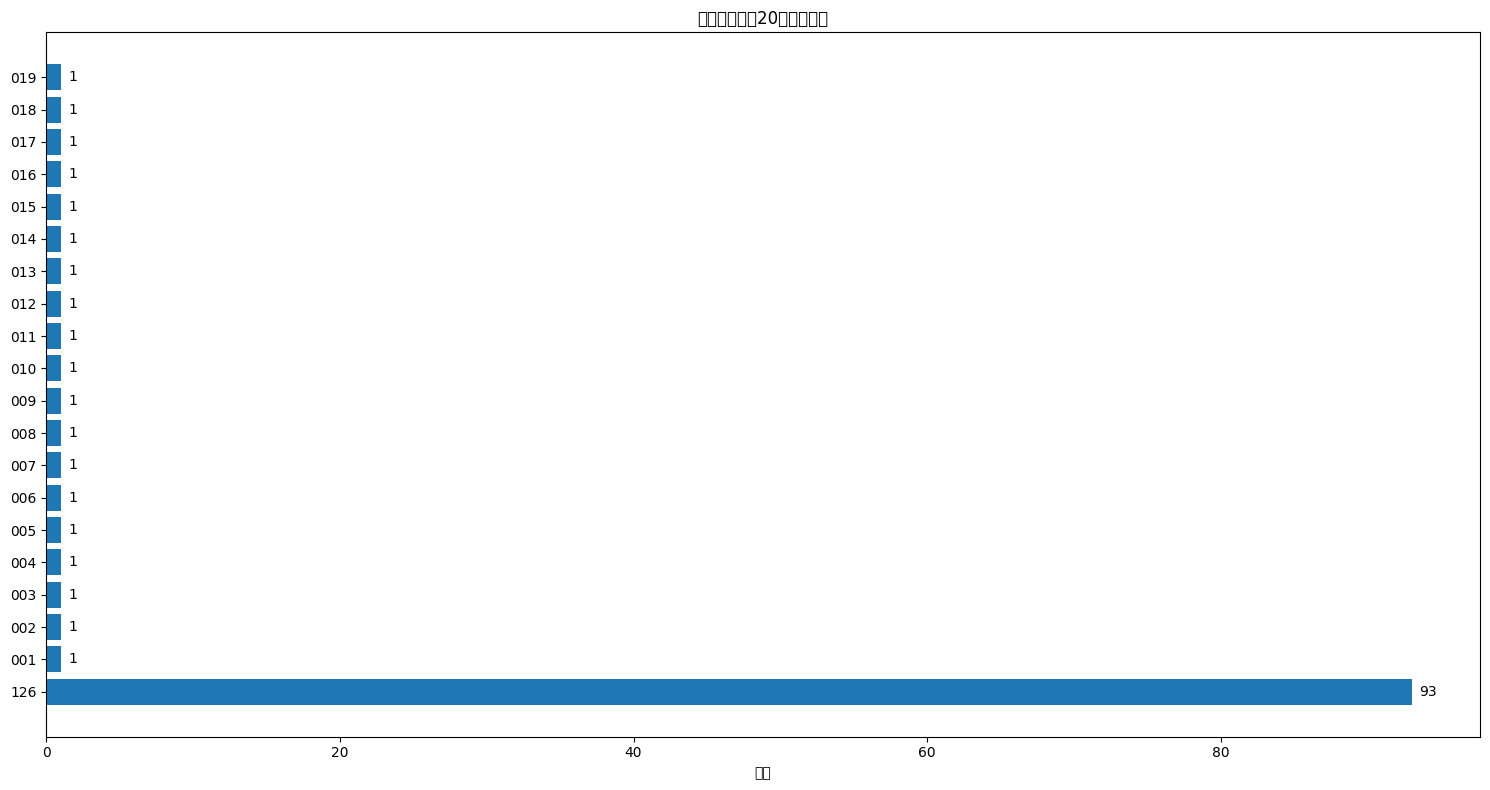

/tmp/ipykernel_21493/2042260.py:137: UserWarning: Glyph 12298 (\N{LEFT DOUBLE ANGLE BRACKET}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_21493/2042260.py:137: UserWarning: Glyph 35199 (\N{CJK UNIFIED IDEOGRAPH-897F}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_21493/2042260.py:137: UserWarning: Glyph 28216 (\N{CJK UNIFIED IDEOGRAPH-6E38}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_21493/2042260.py:137: UserWarning: Glyph 35760 (\N{CJK UNIFIED IDEOGRAPH-8BB0}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_21493/2042260.py:137: UserWarning: Glyph 12299 (\N{RIGHT DOUBLE ANGLE BRACKET}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_21493/2042260.py:137: UserWarning: Glyph 35789 (\N{CJK UNIFIED IDEOGRAPH-8BCD}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_21493/2042260.py:137: UserWarning: Glyph 20113 (\N{CJK UNIFIED IDEOGRAPH-4E91}) missin

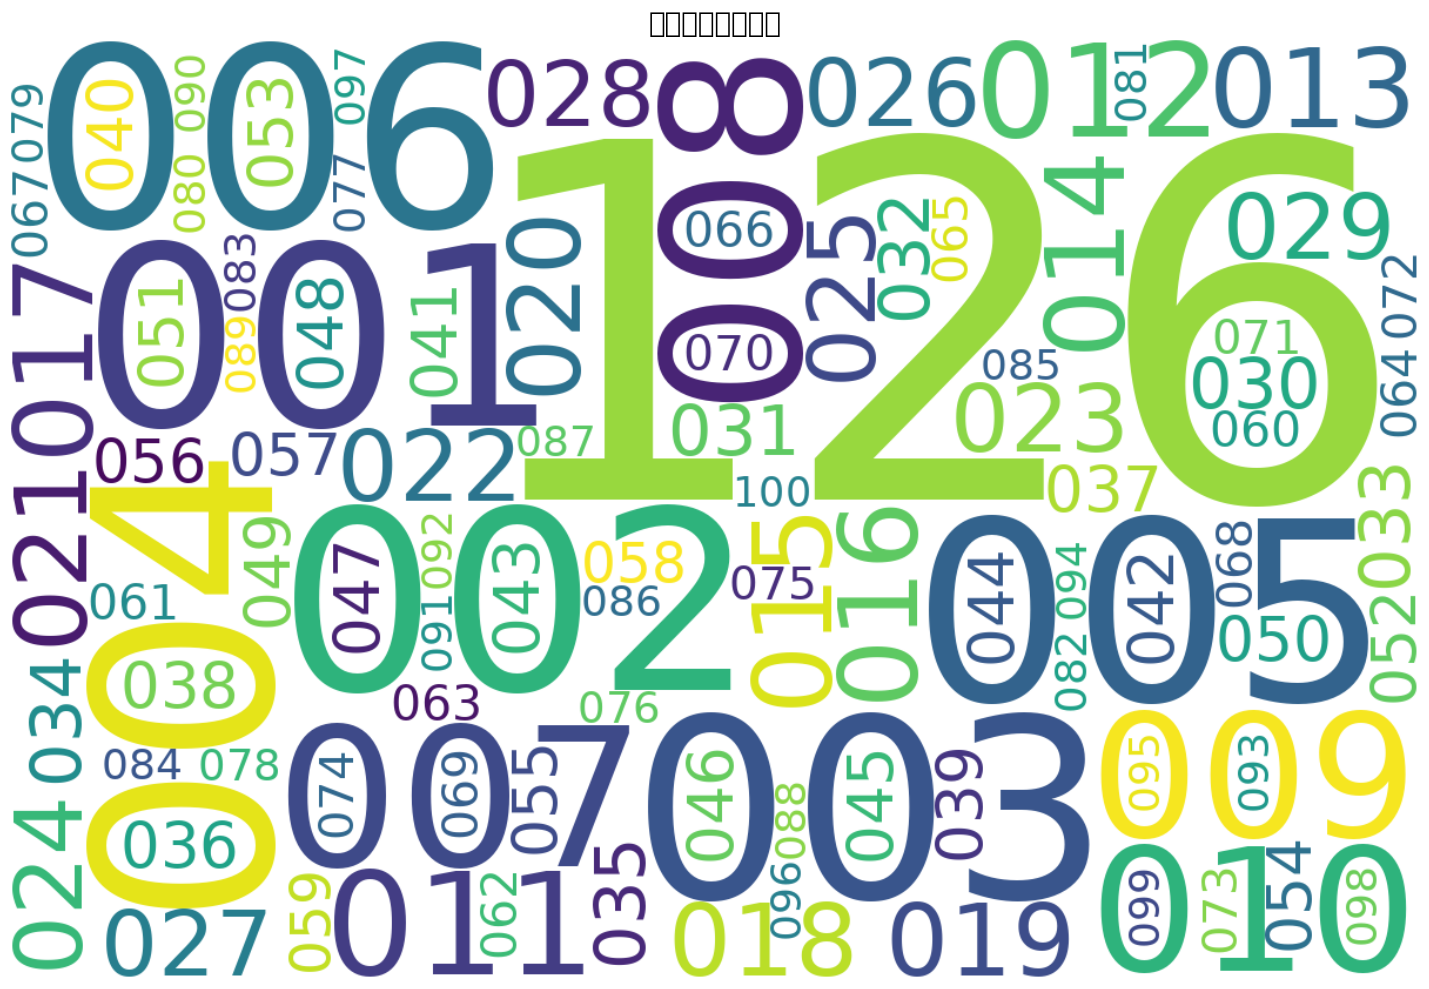

处理完成！


In [4]:
import jieba
import jieba.posseg as pseg
import pandas as pd
import re
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
from wordcloud import WordCloud
import os

# 设置中文字体
import matplotlib
matplotlib.rcParams['font.sans-serif'] = ['Noto Sans CJK SC', 'DejaVu Sans', 'Arial Unicode MS']
matplotlib.rcParams['axes.unicode_minus'] = False

class ChineseTextProcessor:
    def __init__(self, input_file, output_dir):
        self.input_file = input_file
        self.output_dir = output_dir
        self.text = None
        self.words = []
        self.word_counts = Counter()
        
        # 创建输出目录
        os.makedirs(output_dir, exist_ok=True)
    
    def load_text(self):
        """加载文本文件"""
        encodings = ['utf-8', 'gbk', 'gb2312', 'latin-1']
        
        for encoding in encodings:
            try:
                with open(self.input_file, 'r', encoding=encoding) as f:
                    self.text = f.read()
                print(f"成功使用 {encoding} 编码读取文件")
                return True
            except UnicodeDecodeError:
                continue
        
        print("无法读取文件，请检查文件编码")
        return False
    
    def clean_text(self):
        """清理文本"""
        if not self.text:
            return False
        
        # 移除特殊字符，保留中文、数字和基本标点
        self.text = re.sub(r'[^\u4e00-\u9fff\s\d，。！？；：""''（）]', '', self.text)
        self.text = re.sub(r'\s+', ' ', self.text)
        self.text = self.text.strip()
        
        print(f"文本清理完成，长度: {len(self.text)} 字符")
        return True
    
    def segment_text(self, use_stopwords=True, min_length=2):
        """分词处理"""
        if not self.text:
            return False
        
        # 停用词列表
        stopwords = {
            '的', '了', '在', '是', '我', '有', '和', '就', '不', '人', '都', '一', '一个', '上', '也', '很', '到', '说', '要', '去', '你', '会', '着', '没有', '看', '好', '自己', '这', '那', '他', '她', '它', '们', '个', '为', '对', '能', '把', '被', '给', '让', '从', '向', '到', '来', '去', '出', '进', '回', '过', '来', '去', '上', '下', '左', '右', '前', '后', '里', '外', '中', '间', '旁边', '附近', '周围', '里面', '外面', '上面', '下面', '前面', '后面', '左边', '右边'
        }
        
        # 使用jieba分词
        words = jieba.cut(self.text)
        
        # 过滤词
        self.words = []
        for word in words:
            word = word.strip()
            if len(word) >= min_length and word not in stopwords:
                self.words.append(word)
        
        # 统计词频
        self.word_counts = Counter(self.words)
        
        print(f"分词完成，共得到 {len(self.words)} 个词，{len(self.word_counts)} 个唯一词汇")
        return True
    
    def pos_tagging(self):
        """词性标注"""
        if not self.text:
            return None
        
        pos_words = pseg.cut(self.text)
        pos_results = []
        
        for word, flag in pos_words:
            if len(word.strip()) > 1:
                pos_results.append((word.strip(), flag))
        
        return pos_results
    
    def save_results(self):
        """保存所有结果"""
        # 保存分词结果
        with open(f'{self.output_dir}/segmented_words.txt', 'w', encoding='utf-8') as f:
            f.write('\n'.join(self.words))
        
        # 保存词频统计
        with open(f'{self.output_dir}/word_frequency.txt', 'w', encoding='utf-8') as f:
            for word, count in self.word_counts.most_common():
                f.write(f'{word}\t{count}\n')
        
        # 保存为CSV
        df_freq = pd.DataFrame(self.word_counts.most_common(), columns=['word', 'frequency'])
        df_freq.to_csv(f'{self.output_dir}/word_frequency.csv', index=False, encoding='utf-8')
        
        # 词性标注结果
        pos_results = self.pos_tagging()
        if pos_results:
            df_pos = pd.DataFrame(pos_results, columns=['word', 'pos'])
            df_pos.to_csv(f'{self.output_dir}/pos_tagging.csv', index=False, encoding='utf-8')
        
        print(f"所有结果已保存到: {self.output_dir}")
    
    def generate_wordcloud(self):
        """生成词云"""
        if not self.word_counts:
            return
        
        # 生成词云
        wordcloud = WordCloud(
            font_path='/usr/share/fonts/truetype/dejavu/DejaVuSans.ttf',  # 根据系统调整
            width=1200, 
            height=800,
            background_color='white',
            max_words=200
        ).generate_from_frequencies(self.word_counts)
        
        plt.figure(figsize=(15, 10))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.title('《西游记》词云图', fontsize=20)
        plt.tight_layout()
        plt.savefig(f'{self.output_dir}/wordcloud.png', dpi=300, bbox_inches='tight')
        plt.show()
    
    def visualize_frequency(self, top_n=20):
        """可视化词频"""
        if not self.word_counts:
            return
        
        top_words = self.word_counts.most_common(top_n)
        words, counts = zip(*top_words)
        
        plt.figure(figsize=(15, 8))
        bars = plt.barh(range(len(words)), counts)
        plt.yticks(range(len(words)), words)
        plt.xlabel('词频')
        plt.title(f'《西游记》前{top_n}个高频词汇')
        
        # 在柱状图上添加数值标签
        for i, (bar, count) in enumerate(zip(bars, counts)):
            plt.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height()/2, 
                    str(count), ha='left', va='center')
        
        plt.tight_layout()
        plt.savefig(f'{self.output_dir}/frequency_chart.png', dpi=300, bbox_inches='tight')
        plt.show()
    
    def process(self):
        """完整处理流程"""
        print("开始处理《西游记》文本...")
        
        # 1. 加载文本
        if not self.load_text():
            return False
        
        # 2. 清理文本
        if not self.clean_text():
            return False
        
        # 3. 分词
        if not self.segment_text():
            return False
        
        # 4. 保存结果
        self.save_results()
        
        # 5. 生成可视化
        self.visualize_frequency()
        self.generate_wordcloud()
        
        print("处理完成！")
        return True

# 使用示例
if __name__ == "__main__":
    # 文件路径
    input_file = '../../data/journey_to_the_west/journey_to_the_west.txt'
    output_dir = '../../data/journey_to_the_west/journey_to_the_west_segmented'
    
    # 创建处理器并运行
    processor = ChineseTextProcessor(input_file, output_dir)
    processor.process()

In [12]:
# 简化版本，减少依赖冲突
import warnings
warnings.filterwarnings('ignore')

import jieba
import re
from gensim.models import Word2Vec
import os

def simple_word2vec_analysis():
    """简化的Word2Vec分析"""
    
    # 文件路径
    input_file = '../../data/journey_to_the_west/journey_to_the_west.txt'
    output_dir = '../../data/journey_to_the_west/word2vec_simple'
    os.makedirs(output_dir, exist_ok=True)
    
    print("开始处理《西游记》文本...")
    
    # 1. 加载文本
    encodings = ['utf-8', 'gbk', 'gb2312', 'latin-1']
    text = None
    
    for encoding in encodings:
        try:
            with open(input_file, 'r', encoding=encoding) as f:
                text = f.read()
            print(f"成功使用 {encoding} 编码读取文件")
            break
        except UnicodeDecodeError:
            continue
    
    if not text:
        print("无法读取文件")
        return None
    
    # 2. 清理文本
    text = re.sub(r'[^\u4e00-\u9fff\s\d，。！？；：""''（）]', '', text)
    text = re.sub(r'\s+', ' ', text)
    
    # 3. 分割句子并分词
    sentences = []
    sentence_pattern = r'[。！？]+'
    raw_sentences = re.split(sentence_pattern, text)
    
    stopwords = {'的', '了', '在', '是', '我', '有', '和', '就', '不', '人', '都', '一', '一个', '上', '也', '很', '到', '说', '要', '去', '你', '会', '着', '没有', '看', '好', '自己', '这', '那', '他', '她', '它', '们', '个', '为', '对', '能', '把', '被', '给', '让', '从', '向', '到', '来', '去', '出', '进', '回', '过', '来', '去', '上', '下', '左', '右', '前', '后', '里', '外', '中', '间'}
    
    for sentence in raw_sentences:
        sentence = sentence.strip()
        if len(sentence) > 5:
            words = jieba.cut(sentence)
            filtered_words = [word.strip() for word in words 
                            if len(word.strip()) > 1 and word.strip() not in stopwords]
            if len(filtered_words) > 3:
                sentences.append(filtered_words)
    
    print(f"处理完成，共 {len(sentences)} 个有效句子")
    
    # 4. 训练Word2Vec模型
    print("开始训练Word2Vec模型...")
    try:
        model = Word2Vec(
            sentences=sentences,
            vector_size=100,
            window=5,
            min_count=3,
            workers=4,
            sg=1,
            epochs=10
        )
        
        print(f"模型训练完成，词汇表大小: {len(model.wv.key_to_index)}")
        
        # 5. 保存模型
        model_path = f'{output_dir}/journey_to_west_word2vec.model'
        model.save(model_path)
        print(f"模型已保存到: {model_path}")
        
        # 6. 分析角色相似性
        print("\n=== 角色相似性分析 ===")
        
        # 检查角色是否在词汇表中
        characters = ['孙悟空', '猪八戒', '唐僧', '沙僧']
        available_chars = [char for char in characters if char in model.wv.key_to_index]
        print(f"在词汇表中的角色: {available_chars}")
        
        # 计算相似性
        for i, char1 in enumerate(available_chars):
            for j, char2 in enumerate(available_chars[i+1:], i+1):
                try:
                    similarity = model.wv.similarity(char1, char2)
                    print(f"{char1} vs {char2}: {similarity:.4f}")
                except KeyError:
                    print(f"{char1} vs {char2}: 词汇不在词汇表中")
        
        # 特别关注孙悟空和猪八戒
        if '孙悟空' in model.wv.key_to_index and '猪八戒' in model.wv.key_to_index:
            similarity = model.wv.similarity('孙悟空', '猪八戒')
            print(f"\n孙悟空和猪八戒的相似性: {similarity:.4f}")
            
            # 查找相似词汇
            print("\n孙悟空相关词汇:")
            try:
                similar_words = model.wv.most_similar('孙悟空', topn=10)
                for word, sim in similar_words:
                    print(f"  {word}: {sim:.4f}")
            except KeyError:
                print("孙悟空不在词汇表中")
            
            print("\n猪八戒相关词汇:")
            try:
                similar_words = model.wv.most_similar('猪八戒', topn=10)
                for word, sim in similar_words:
                    print(f"  {word}: {sim:.4f}")
            except KeyError:
                print("猪八戒不在词汇表中")
        
        return model
        
    except Exception as e:
        print(f"训练模型时出错: {e}")
        return None

if __name__ == "__main__":
    model = simple_word2vec_analysis()
    if model:
        print("\n处理完成！")
    else:
        print("处理失败")

AttributeError: module 'numpy' has no attribute '_no_nep50_warning'